In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('app_data.csv')
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         428 non-null    float64
 1   BMI                         430 non-null    float64
 2   Sex                         430 non-null    object 
 3   Height                      430 non-null    float64
 4   Weight                      430 non-null    float64
 5   AlvaradoScore               430 non-null    int64  
 6   PediatricAppendicitisScore  430 non-null    int64  
 7   AppendixOnSono              428 non-null    object 
 8   AppendixDiameter            266 non-null    float64
 9   MigratoryPain               430 non-null    object 
 10  LowerAbdominalPainRight     429 non-null    object 
 11  ReboundTenderness           427 non-null    object 
 12  CoughingPain                429 non-null    object 
 13  PsoasSign                   393 non

In [4]:
#column dropping considering y3= AppendicitisComplications
df.drop(['AppendicitisComplications','DiagnosisByCriteria'],axis=1,inplace=True)

# Ultrasound
df.drop(['AppendixOnSono','AppendixDiameter','AppendixWallLayers','Kokarde','TissuePerfusion','SurroundingTissueReaction',
        'BowelWallThick','Ileus','Enteritis','Peritonitis'],axis=1,inplace=True)

In [5]:
#df.info()

In [6]:
df_numerical = df.filter(['Age','BMI','Height','Weight','AlvaradoScore','PediatricAppendicitisScore',
                    'AppendixDiameter','BodyTemp','WBCCount','NeutrophilPerc','CRPEntry'],axis=1).copy()

In [7]:
#df_numerical.info()

In [8]:
df_categorical = df.filter(['Sex','KetonesInUrine','ErythrocytesInUrine','WBCInUrine',
                           'AppendixWallLayers','TissuePerfusion'],axis=1).copy()

In [9]:
#df_categorical.info()

In [10]:
#df_categorical.head()

In [11]:
df_boolean = df.filter(['AppendixOnSono','MigratoryPain','LowerAbdominalPainRight','ReboundTenderness','CoughingPain',
                    'Nausea','AppetiteLoss','Dysuria','FreeFluids','Kokarde',
                    'SurroundingTissueReaction','PathLymphNodes','MesentricLymphadenitis','BowelWallThick','Ileus',
                    'FecalImpaction','Meteorism','Enteritis','TreatmentGroupBinar',
                     'PsoasSign','Stool'],axis=1).copy()

In [12]:
#df_boolean.info()

In [13]:
#df_boolean.sample(10)

In [14]:
#pandas profiling
#from pandas_profiling import ProfileReport

In [15]:
#profile = ProfileReport(df)
#profile.to_file(output_file = "AppendicitisComplications_profiling.html")

In [16]:
#perform label Encoding for categorical data

from sklearn.preprocessing import LabelEncoder
from pandas import Series
df_categorical = df_categorical.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [17]:
#df_categorical.info()

In [18]:
df_categorical.head()

,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine
0,1,0.0,0.0,3.0
1,0,NaN,NaN,NaN
2,1,3.0,3.0,3.0
3,1,3.0,3.0,3.0
4,0,3.0,3.0,3.0


In [19]:
#concatanation two dataframe
df_new = pd.concat([df_numerical,df_categorical],axis=1)

In [20]:
#df_new.info()

In [21]:
# MICE imputation
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [22]:
# Define MICE Imputer and fill missing values

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_new), columns=df_new.columns)

In [23]:
df_mice_imputed.head()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine
0,12.531143,16.494601,159.0,41.7,7.0,5.0,38.7,13.3,66.0,76.0,1.0,0.000000,0.000000,3.000000
1,12.410678,12.595222,152.0,29.1,8.0,8.0,38.8,14.9,93.2,10.0,0.0,2.329662,2.520289,2.949463
2,10.537988,15.991247,133.5,28.5,3.0,3.0,37.2,6.6,55.3,13.0,1.0,3.000000,3.000000,3.000000
3,10.425736,16.185025,146.0,34.5,4.0,3.0,37.0,12.4,57.9,6.0,1.0,3.000000,3.000000,3.000000
4,13.270363,20.449137,164.0,55.0,2.0,2.0,37.2,4.2,50.6,2.0,0.0,3.000000,3.000000,3.000000


In [24]:
#df_knn_imputed.info()

In [25]:
#df_knn_imputed.isnull()

In [26]:
#perform labelEncoding for Boolean data
df_boolean = df_boolean.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [27]:
#df_boolean.head()

In [28]:
df_boolean = df_boolean.fillna(df_boolean.mode().iloc[0])

In [29]:
#df_boolean.sample(20)

In [30]:
#df_boolean.info()

In [31]:
#concatanation two dataframe
df_final = pd.concat([df_mice_imputed,df_boolean],axis=1)

In [32]:
#df_final.info()

In [33]:
#correlation and pvalue

from scipy import stats
corr_df=pd.DataFrame(columns=['r','p'])

for col in df_final:
    print(col)
    if pd.api.types.is_numeric_dtype(df_final[col]):
        r,p = stats.pearsonr(df_final.TreatmentGroupBinar,df_final[col])
        corr_df.loc[col]=[round(r,3),round(p,3)]

corr_df

Age
BMI
Height
Weight
AlvaradoScore
PediatricAppendicitisScore
BodyTemp
WBCCount
NeutrophilPerc
CRPEntry
Sex
KetonesInUrine
ErythrocytesInUrine
WBCInUrine
MigratoryPain
LowerAbdominalPainRight
ReboundTenderness
CoughingPain
Nausea
AppetiteLoss
Dysuria
FreeFluids
PathLymphNodes
MesentricLymphadenitis
FecalImpaction
Meteorism
TreatmentGroupBinar
PsoasSign
Stool


,r,p
Age,-0.069,0.156
BMI,-0.088,0.070
Height,-0.070,0.146
Weight,-0.085,0.078
AlvaradoScore,0.410,0.000
PediatricAppendicitisScore,0.332,0.000
BodyTemp,0.210,0.000
WBCCount,0.442,0.000
NeutrophilPerc,0.432,0.000
CRPEntry,0.375,0.000


In [34]:
#pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

In [35]:
df_final['TreatmentGroupBinar'].value_counts()

0    265
1    165
Name: TreatmentGroupBinar, dtype: int64

In [36]:
no = df_final[df_final.TreatmentGroupBinar==0]
yes = df_final[df_final.TreatmentGroupBinar==1]

In [37]:
print(no.shape)
print(yes.shape)

(265, 29)
(165, 29)


In [38]:
#spliting the data for training and testing

X=df_final.drop(columns='TreatmentGroupBinar',axis=1)
Y=df_final['TreatmentGroupBinar']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, stratify=Y, random_state=2)

In [40]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(430,)
(344,)
(86,)


# Logisting Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model_score2 = model.score(X_test, Y_test)
model_score1 = model.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.7848837209302325
0.6744186046511628


In [43]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, X, Y, cv=5)
#scores

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_train, Y_train, cv = kf)
result


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.74285714, 0.8       , 0.65714286, 0.68571429, 0.67647059,
       0.73529412, 0.82352941, 0.73529412, 0.79411765, 0.73529412])

In [45]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7385714285714287


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_test, Y_test, cv = kf)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.77777778, 0.55555556, 0.44444444, 0.66666667, 0.66666667,
       0.55555556, 1.        , 0.875     , 0.5       , 0.625     ])

In [47]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6666666666666667


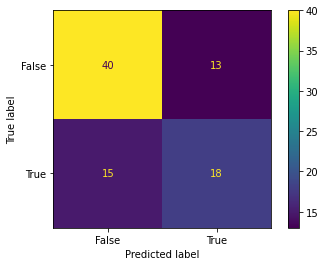

In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
 
# make predictions
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [49]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.5454545454545454
specificity:  0.7547169811320755
PPV:  0.5806451612903226
NPV:  0.7272727272727273


In [50]:
# AUROC and AUPR value
from sklearn.metrics import auc, roc_curve, precision_recall_curve

y_predictProb = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.7392795883361922
AUPR: 0.7042386006098589


<function matplotlib.pyplot.show(close=None, block=None)>

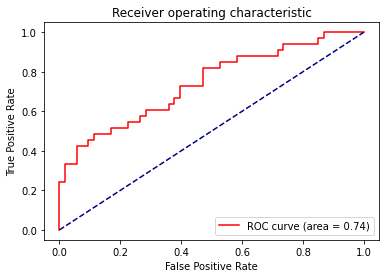

In [51]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

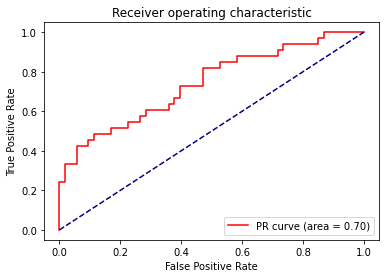

In [52]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [54]:
model_score2 = forest.score(X_test, Y_test)
model_score1 = forest.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9854651162790697
0.6511627906976745


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_train, Y_train, cv = kf)
result


array([0.8       , 0.77142857, 0.68571429, 0.74285714, 0.70588235,
       0.61764706, 0.76470588, 0.73529412, 0.70588235, 0.67647059])

In [56]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7205882352941178


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_test, Y_test, cv = kf)
result

array([0.77777778, 0.66666667, 0.33333333, 0.55555556, 0.66666667,
       0.44444444, 0.625     , 0.875     , 0.625     , 0.625     ])

In [58]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6194444444444445


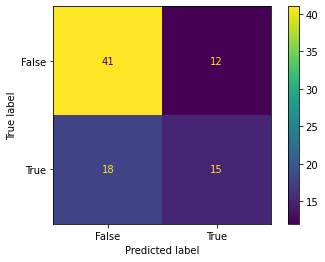

In [59]:
# make predictions
predicted = forest.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [60]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.45454545454545453
specificity:  0.7735849056603774
PPV:  0.5555555555555556
NPV:  0.6949152542372882


In [61]:
y_predictProb = forest.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.6669525443110349
AUPR: 0.5568827350207645


<function matplotlib.pyplot.show(close=None, block=None)>

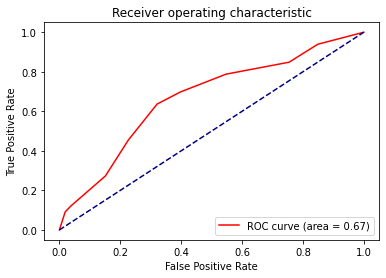

In [62]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

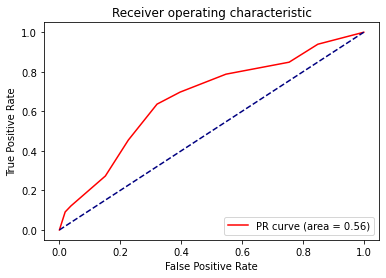

In [63]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Decision Tree

In [64]:
# using decisin tree
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
model_score2 = dclf.score(X_test, Y_test)
model_score1 = dclf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

1.0
0.5348837209302325


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_train, Y_train, cv = kf)
result


array([0.71428571, 0.77142857, 0.77142857, 0.62857143, 0.64705882,
       0.67647059, 0.67647059, 0.76470588, 0.64705882, 0.70588235])

In [67]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7003361344537815


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_test, Y_test, cv = kf)
result

array([0.66666667, 0.55555556, 0.33333333, 0.55555556, 0.77777778,
       0.66666667, 0.5       , 0.75      , 0.5       , 0.625     ])

In [69]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.5930555555555556


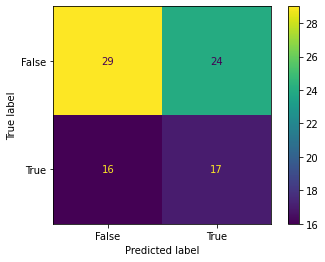

In [70]:
# make predictions
predicted = dclf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [71]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.5151515151515151
specificity:  0.5471698113207547
PPV:  0.4146341463414634
NPV:  0.6444444444444445


In [72]:
# AUROC and AUPR value
y_predictProb = dclf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.531160663236135
AUPR: 0.5579160865604427


<function matplotlib.pyplot.show(close=None, block=None)>

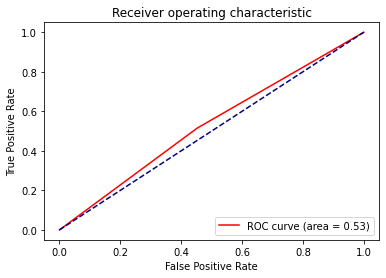

In [73]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

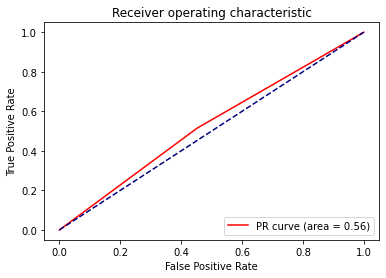

In [74]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Gradient Boost

In [75]:
#using GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
gdb.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [76]:
model_score2 = gdb.score(X_test, Y_test)
model_score1 = gdb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.8401162790697675
0.6627906976744186


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_train, Y_train, cv = kf)
result

array([0.8       , 0.8       , 0.68571429, 0.74285714, 0.61764706,
       0.67647059, 0.82352941, 0.85294118, 0.73529412, 0.70588235])

In [78]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7440336134453782


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_test, Y_test, cv = kf)
result

array([0.88888889, 0.77777778, 0.55555556, 0.33333333, 0.55555556,
       0.44444444, 0.875     , 0.625     , 0.375     , 0.625     ])

In [80]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6055555555555555


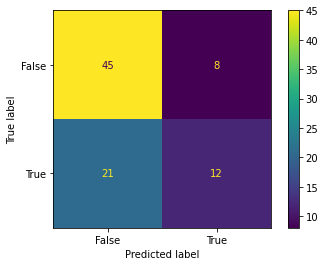

In [81]:
# make predictions
predicted = gdb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [82]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.36363636363636365
specificity:  0.8490566037735849
PPV:  0.6
NPV:  0.6818181818181818


In [83]:
# AUROC and AUPR value
y_predictProb = gdb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.698399085191538
AUPR: 0.6065113159501515


<function matplotlib.pyplot.show(close=None, block=None)>

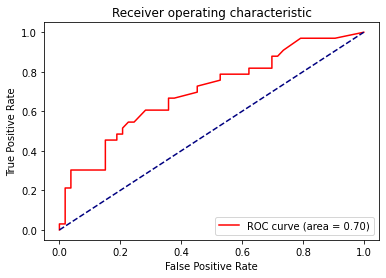

In [84]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

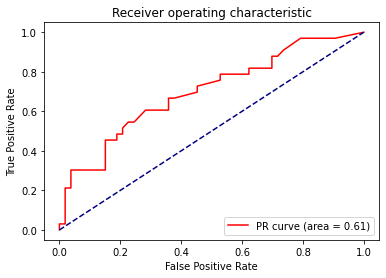

In [85]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# XGBosst

In [86]:
#using XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state = 1, n_estimators = 10, min_samples_split = 3)
xgb_clf.fit(X_train, Y_train)

[22:25:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              min_samples_split=3, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, ...)

In [87]:
model_score2 = xgb_clf.score(X_test, Y_test)
model_score1 = xgb_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9883720930232558
0.686046511627907


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_train, Y_train, cv = kf)
result


[22:25:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.71428571, 0.8       , 0.71428571, 0.74285714, 0.67647059,
       0.79411765, 0.73529412, 0.67647059, 0.70588235, 0.70588235])

In [89]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7265546218487395


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_test, Y_test, cv = kf)
result

[22:25:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.88888889, 0.88888889, 0.44444444, 0.55555556, 0.88888889,
       0.44444444, 0.75      , 0.875     , 0.25      , 0.5       ])

In [91]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.648611111111111


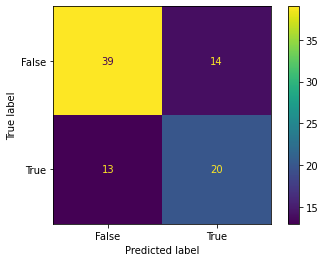

In [92]:
# make predictions
predicted = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [93]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.6060606060606061
specificity:  0.7358490566037735
PPV:  0.5882352941176471
NPV:  0.75


In [94]:
# AUROC and AUPR value
y_predictProb = xgb_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.7109777015437393
AUPR: 0.6228693923215372


<function matplotlib.pyplot.show(close=None, block=None)>

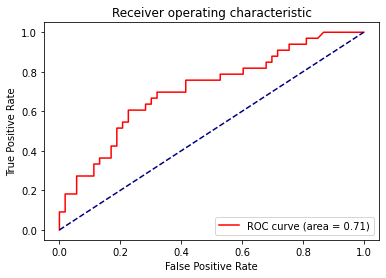

In [95]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

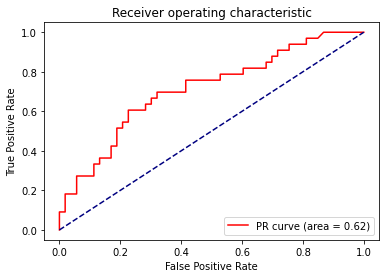

In [96]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Support Vector

In [97]:
#using support vector
from sklearn import svm
sv_clf = svm.SVC()
sv_clf.fit(X_train, Y_train)

SVC()

In [98]:
model_score2 = sv_clf.score(X_test, Y_test)
model_score1 = sv_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.7034883720930233
0.6976744186046512


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_train, Y_train, cv = kf)
result


array([0.74285714, 0.8       , 0.74285714, 0.57142857, 0.64705882,
       0.61764706, 0.70588235, 0.76470588, 0.61764706, 0.70588235])

In [100]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6915966386554622


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_test, Y_test, cv = kf)
result

array([0.77777778, 0.77777778, 0.66666667, 0.44444444, 0.55555556,
       0.55555556, 0.875     , 0.875     , 0.5       , 0.75      ])

In [102]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6777777777777778


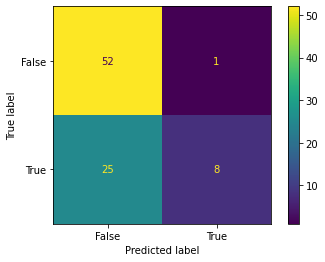

In [103]:
# make predictions
predicted = sv_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [104]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.24242424242424243
specificity:  0.9811320754716981
PPV:  0.8888888888888888
NPV:  0.6753246753246753


In [105]:
# AUROC and AUPR value
y_predictProb = sv_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

In [ ]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Naive Bayes

In [106]:
#using Naive Bayesian 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [107]:
model_score2 = gnb.score(X_test, Y_test)
model_score1 = gnb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.75
0.7325581395348837


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_train, Y_train, cv = kf)
result


array([0.8       , 0.68571429, 0.77142857, 0.65714286, 0.64705882,
       0.70588235, 0.82352941, 0.73529412, 0.73529412, 0.73529412])

In [109]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7296638655462185


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_test, Y_test, cv = kf)
result

array([0.22222222, 0.44444444, 0.55555556, 0.55555556, 0.66666667,
       0.66666667, 0.75      , 0.25      , 0.625     , 0.625     ])

In [111]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.5361111111111111


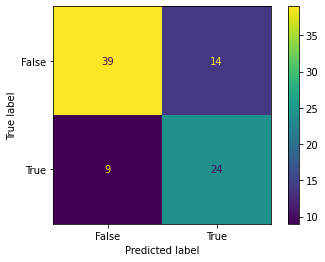

In [112]:
# make predictions
predicted = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [113]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.7272727272727273
specificity:  0.7358490566037735
PPV:  0.631578947368421
NPV:  0.8125


In [114]:
# AUROC and AUPR value
y_predictProb = gnb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.8038879359634077
AUPR: 0.7570405726478049


<function matplotlib.pyplot.show(close=None, block=None)>

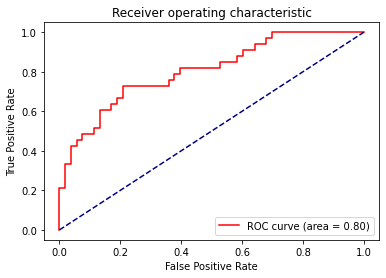

In [115]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

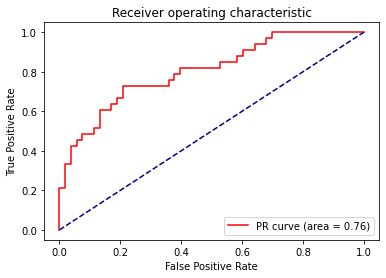

In [116]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show